In [5]:
import pygad
from pygad import visualize
import numpy as np

In [5]:
# output to optimize with GA: y = w1x1 + w2x2 + ... + w6x6. The weights (w1,...,w6) are the "genes"
func_inputs = [4, -2, 3.5, 5, -11, -4.7] # values of x1, x2, ... , x6
goal_output = 44

In [7]:
def fitness(ga_instance, solution, solution_idx):
    output = np.sum(solution * func_inputs) # output linear combination (inner product) to optimize towards goal_output
    fitness_score = 1 / np.abs(output - goal_output) # fitness score: < 1 when abs(output - goal) > 1, > 1 when abs(output - goal) < 1, = 1    => large value good
    return fitness_score

In [159]:
# pygad parameters
n_gens = 50
n_parents_mating = 4
sol_per_pop = 8
n_genes = len(func_inputs)
init_range_low = -2
init_range_high = 5
parent_selection_type = "sss"
keep_parents = 1
crossover_type = "single_point"
mutation_type = "random"
mutation_num_genes = 1

# create genetic algorithm instance
ga_instance = pygad.GA(num_generations=n_gens,
                       fitness_func=fitness,
                       sol_per_pop=sol_per_pop,
                       num_genes=n_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=mutation_num_genes,
                       num_parents_mating= n_parents_mating,
                       save_solutions=True
                       )
ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()
prediction = np.sum(solution * np.array(func_inputs))

print(f"Best solution parameters (weights): {solution}\nFitness score for best solution: {solution_fitness}\nSolution idx: {solution_idx}")
print(f"Prediction from GA: {prediction} | Real solution: {goal_output}")

# Note that a very large fitness score implies being very close to the solution

Best solution parameters (weights): [ 5.72617384  2.58154793  4.23973182  3.20215368  0.63582468 -0.51018769]
Fitness score for best solution: 210.0824291958787
Solution idx: 0
Prediction from GA: 43.99523996364747 | Real solution: 44


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


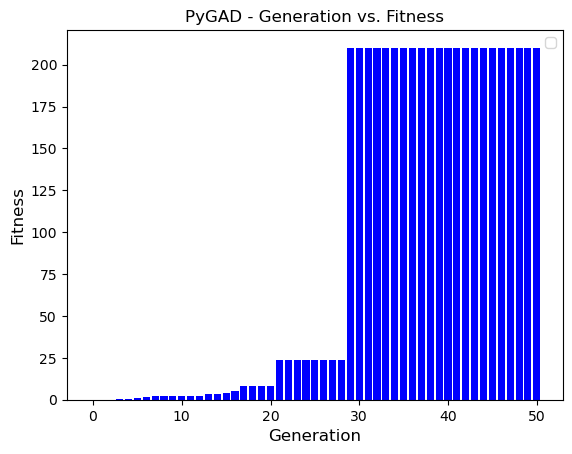

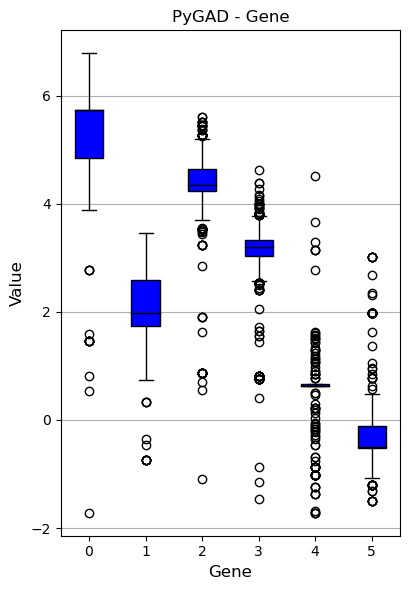

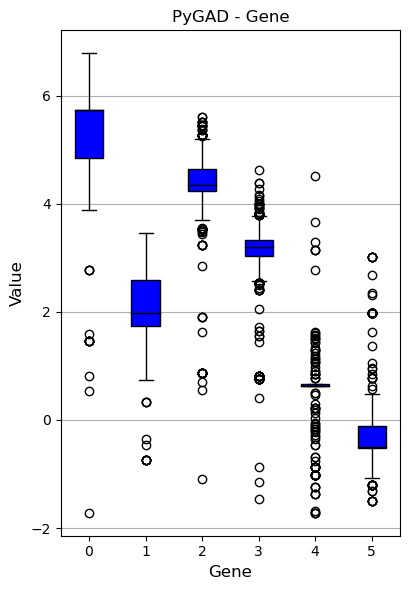

In [160]:
ga_instance.plot_fitness(font_size=12, plot_type="bar",color="#0000ff")
ga_instance.plot_genes(font_size=12, linewidth=1, plot_type="plot", graph_type="boxplot",fill_color="#0000ff")